In [599]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [600]:
df = pd.read_csv('balance.txt', delimiter=',', engine='python')

In [601]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [602]:
df = pd.get_dummies(df, columns=['Gender', 'Student', 'Married', 'Ethnicity'])

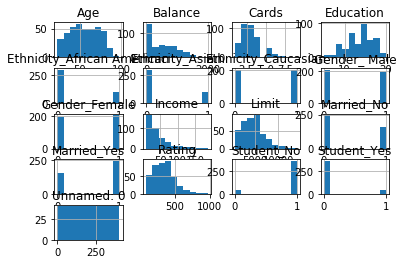

In [603]:
df.hist(); # need to figure out how to change size for any sense of readability
X = df.drop(columns=['Balance']) # This is the column we're trying to predict.
X = sm.add_constant(X)

In [604]:
df.corr()['Balance'].sort_values()

Student_No                   -0.259018
Gender_ Male                 -0.021474
Ethnicity_Asian              -0.009812
Education                    -0.008062
Married_Yes                  -0.005673
Ethnicity_Caucasian          -0.003288
Age                           0.001835
Married_No                    0.005673
Unnamed: 0                    0.006064
Ethnicity_African American    0.013720
Gender_Female                 0.021474
Cards                         0.086456
Student_Yes                   0.259018
Income                        0.463656
Limit                         0.861697
Rating                        0.863625
Balance                       1.000000
Name: Balance, dtype: float64

In [605]:
# Income has some correlation, while limit and rating are heavily correlated.

In [606]:
y = df.Balance # what we want to predict

In [607]:
limit_balance_df = df[['Limit', 'Balance']]

In [608]:
limit_balance_df.head()

,Limit,Balance
0,3606,333
1,6645,903
2,7075,580
3,9504,964
4,4897,331


In [609]:
limit_balance_df.corr()

,Limit,Balance
Limit,1.000000,0.861697
Balance,0.861697,1.000000


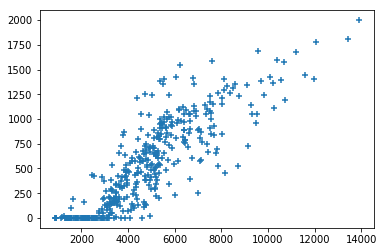

In [610]:
plt.scatter(limit_balance_df.Limit, limit_balance_df.Balance, marker='+');

In [611]:
X = limit_balance_df.drop(columns=['Balance'])
X = sm.add_constant(X)

In [612]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [613]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     915.9
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           4.00e-88
Time:                        00:37:07   Log-Likelihood:                -1830.8
No. Observations:                 268   AIC:                             3666.
Df Residuals:                     266   BIC:                             3673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -301.3226     31.001     -9.720      0.000    -362.361    -240.284
Limit          0.1759      0.006     30.263      0.000       0.164       0.187
==============================================================================
Omnibus:                       14.805   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.969
Skew:                           0.359   Prob(JB):                     1.03e-05
Kurtosis:                       4.242   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [614]:
y_hat = results.predict(X_test)
r2_score(y_test, y_hat)

0.6551943510716851

In [615]:
# I expected R2 score to be much higher due to the close correlation between Limit and Balance.

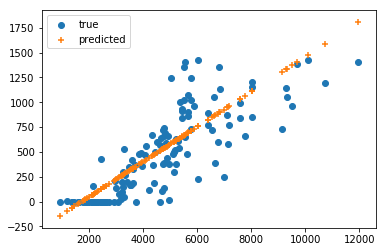

In [616]:
plt.scatter(X_test.Limit, y_test, label='true')
plt.scatter(X_test.Limit, y_hat, label='predicted', marker='+')
plt.legend()

In [617]:
#################################

In [618]:
X = df.drop(columns=['Balance'])
X = sm.add_constant(X)

In [619]:
rating_df = df[['Rating', 'Balance']]
X = sm.add_constant(X)

In [620]:
rating_df.head()

,Rating,Balance
0,283,333
1,483,903
2,514,580
3,681,964
4,357,331


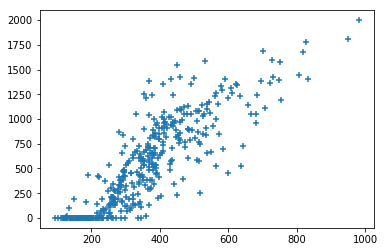

In [621]:
plt.scatter(rating_df.Rating, rating_df.Balance, marker='+');

In [622]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [623]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     450.6
Date:                Thu, 19 Jul 2018   Prob (F-statistic):          5.37e-164
Time:                        00:37:09   Log-Likelihood:                -1615.2
No. Observations:                 268   AIC:                             3256.
Df Residuals:                     255   BIC:                             3303.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -93.7521     16.351     -5.734      0.000    -125.952     -61.552
Unnamed: 0                     0.0195      0.058      0.338      0.736      -0.094       0.133
Income                        -7.5929      0.310    -24.465      0.000      -8.204      -6.982
Limit                          0.2216      0.041      5.454      0.000       0.142       0.302
Rating                         0.6277      0.610      1.029      0.304      -0.573       1.829
Cards                         21.3910      5.356      3.994      0.000      10.844      31.938
Age                           -0.5304      0.385     -1.378      0.169      -1.288       0.227
Education                     -0.5830      2.067     -0.282      0.778      -4.653       3.487
Gender_ Male                 -35.4891     10.522     -3.373      0.001     -56.210     -14.769
Gender_Female                -58.2630     10.271     -5.673      0.000     -78.489     -38.037
Student_No                  -255.1080     12.030    -21.205      0.000    -278.799    -231.417
Student_Yes                  161.3559     14.984     10.768      0.000     131.847     190.864
Married_No                   -45.8819     10.324     -4.444      0.000     -66.213     -25.551
Married_Yes                  -47.8702     10.778     -4.442      0.000     -69.095     -26.645
Ethnicity_African American   -42.7295     11.726     -3.644      0.000     -65.823     -19.636
Ethnicity_Asian              -24.4368     11.232     -2.176      0.030     -46.556      -2.318
Ethnicity_Caucasian          -26.5858     10.150     -2.619      0.009     -46.575      -6.597
==============================================================================
Omnibus:                       18.586   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.032
Skew:                           0.686   Prob(JB):                     2.71e-05
Kurtosis:                       3.006   Cond. No.                     9.12e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.23e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [624]:
y_hat = results.predict(X_test)
r2_score(y_test, y_hat)

0.9522383003309712

In [625]:
# Very high accuracy of prediction

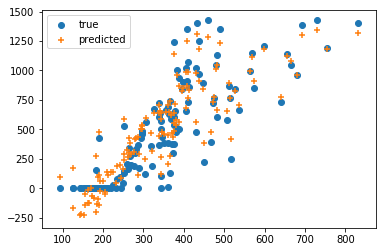

In [627]:
plt.scatter(X_test.Rating, y_test, label='true')
plt.scatter(X_test.Rating, y_hat, label='predicted', marker='+')
plt.legend()